In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

In [3]:
def init(q1, q2, dx, jmax):
  x = np.linspace(0, dx * (jmax - 1), jmax)
  q = np.array([(float(q1) if i < 0.5 * jmax else float(q2)) for i in range(jmax)])
  return (x, q)

In [4]:
def FTCS(q, c, dt, dx, j):
  return 0.5 * c * (q[j + 1] + q[j])

In [5]:
def UPWIND1(q, c, dt, dx, j):
  return c * q[j]

In [6]:
def LAX(q, c, dt, dx, j):
  nu2 = 1/ (c * dt / dx)
  return 0.5 * c * ((1 - nu2) * q[j + 1] + (1 + nu2) * q[j])

In [7]:
def LAXWEN(q, c, dt, dx, j):
  nu = c * dt / dx
  return 0.5 * c * ((1 - nu) * q[j + 1] + (1 + nu) * q[j])

In [10]:
def do_computing(x, q, c, dt, dx, nmax, ff):
  plt.figure(figsize=(7,7), dpi=100)
  plt.rcParams["font.size"] = 22

  plt.plot(x, q, marker='o', lw=2, label='n=0')

  for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(1, jmax - 1):
      ff1 = ff(qold, c, dt, dx, j)
      ff2 = ff(qold, c, dt, dx, j-1)
      q[j] = qold[j] - dt / dx * (ff1 - ff2)

    if n % 2 == 0:
      plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

  plt.grid(color='black', linestyle='dashed', linewidth=0.5)
  plt.xlim([0,2])
  plt.xlabel('x')
  plt.ylabel('q')
  plt.legend()
  plt.show()

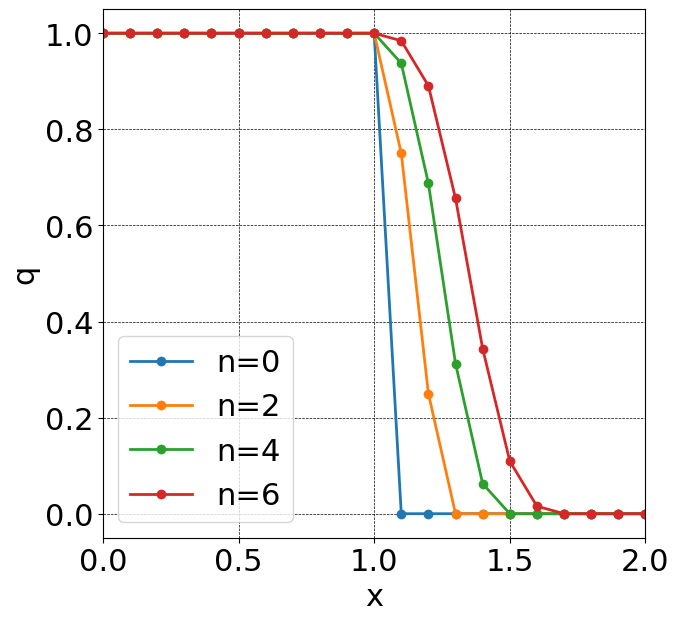

In [11]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, UPWIND1)

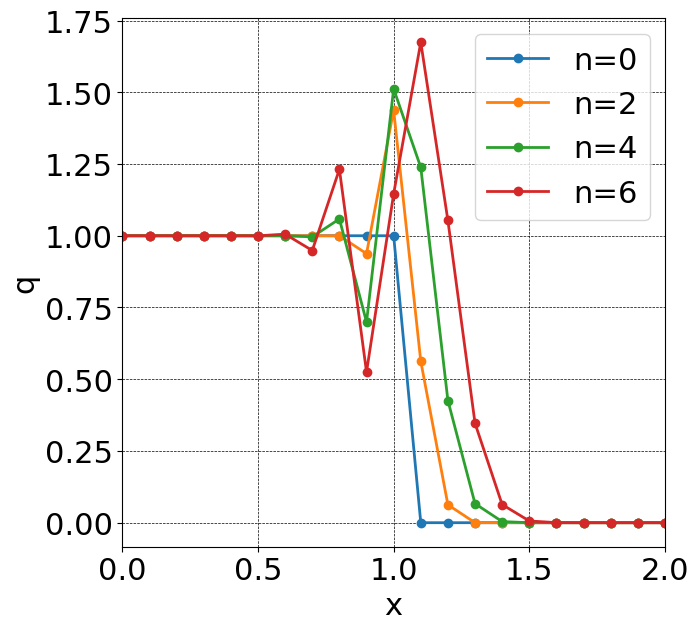

In [12]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, FTCS)

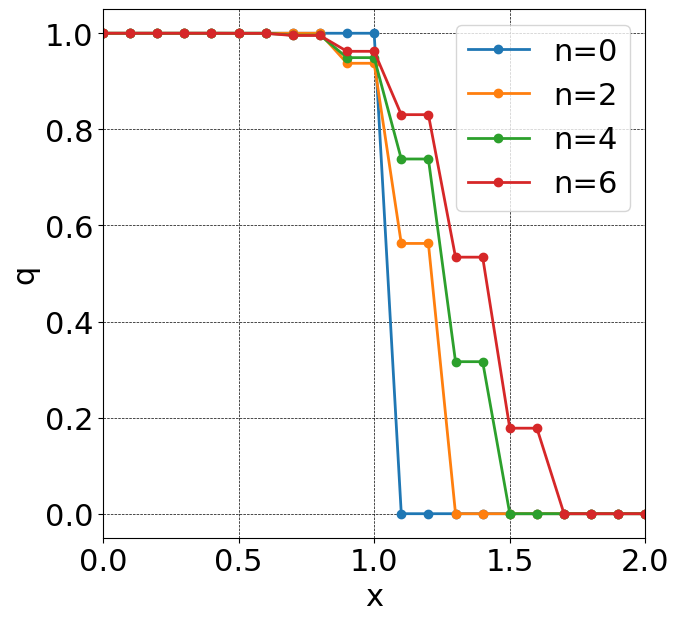

In [13]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAX)

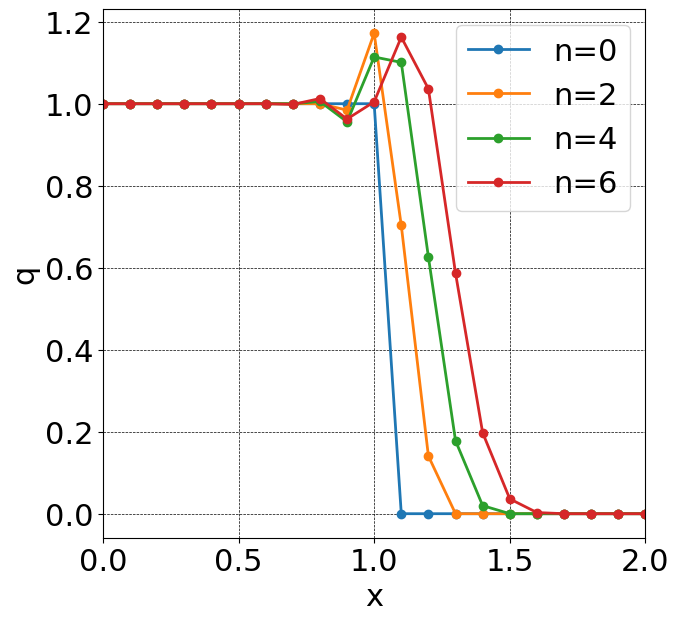

In [14]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAXWEN)

In [15]:
def UPWIND1_mod(q, c, dt, dx, j):
  return 0.5 * ( c * (q[j + 1] + q[j]) - abs(c) * (q[j + 1] - q[j]))

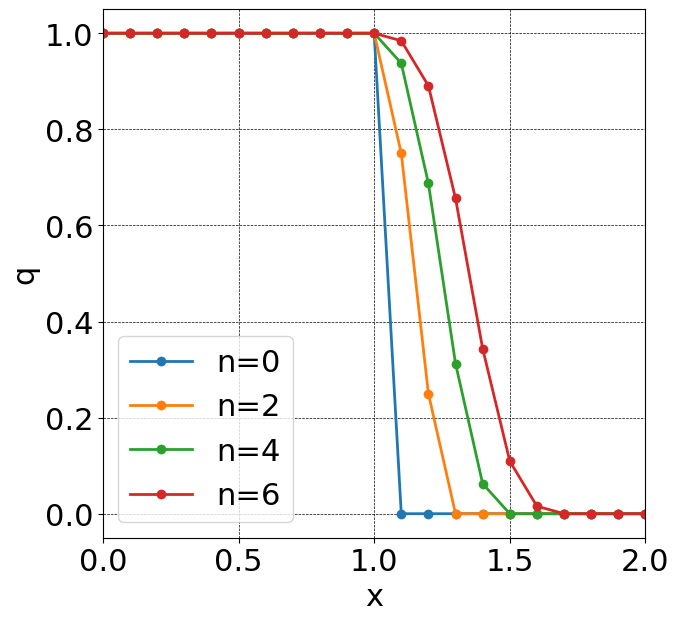

In [16]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, UPWIND1_mod)

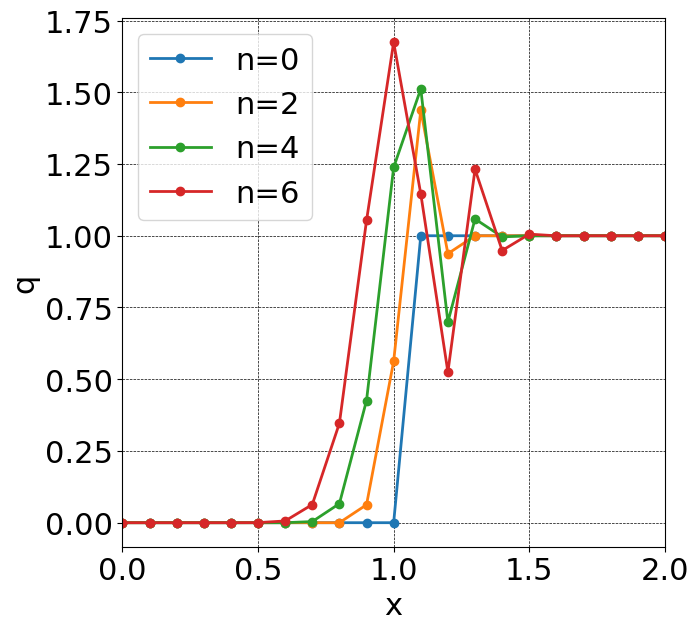

In [18]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, FTCS)

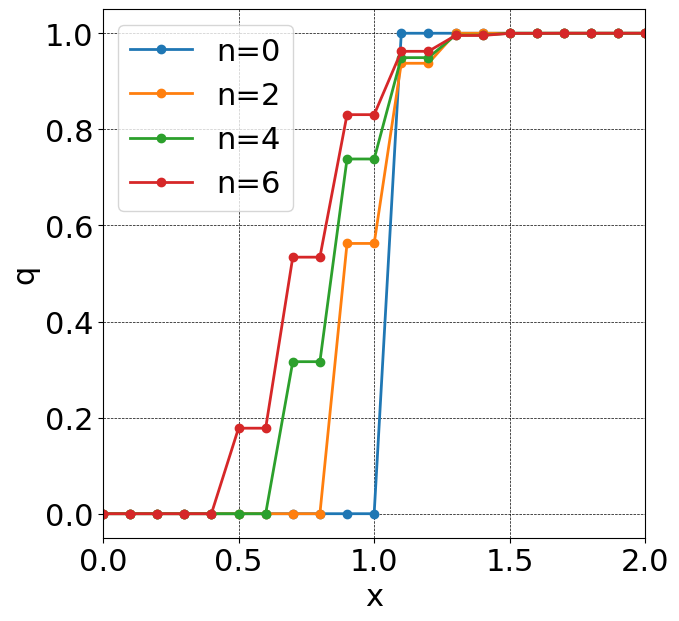

In [19]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAX)

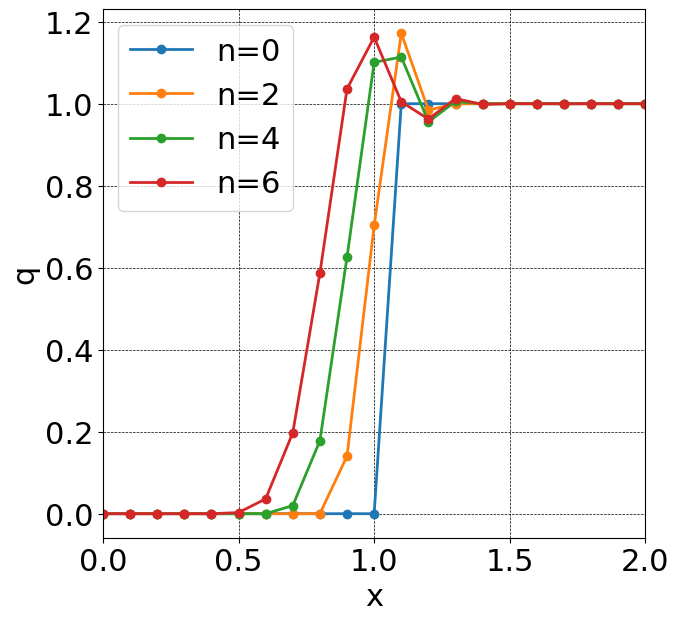

In [20]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAXWEN)